In [1]:
%load_ext autoreload
%autoreload 2

In [180]:
from optimus import Optimus
from optimus.profiler.functions import print_json as j

In [3]:
# Create optimus
op = Optimus(master="local", app_name= "optimus")


             ____        __  _                     
            / __ \____  / /_(_)___ ___  __  _______
           / / / / __ \/ __/ / __ `__ \/ / / / ___/
          / /_/ / /_/ / /_/ / / / / / / /_/ (__  ) 
          \____/ .___/\__/_/_/ /_/ /_/\__,_/____/  
              /_/                                  
              
Just checking that all necessary environments vars are present...
-----
PYSPARK_PYTHON=python
SPARK_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
JAVA_HOME=C:\java8
-----
Starting or getting SparkSession and SparkContext...
Setting checkpoint folder ( local ). If you are in a cluster initialize optimus with master='your_ip' as param
Deleting previous folder if exists...
Creating the checkpoint directory...
Optimus successfully imported. Have fun :).


In [182]:
df = op.read.csv("Meteorite_Landings.csv", header=True)

In [5]:
df.show(10)

+-------------------+---+--------+-----------+--------+----+--------------------+----------+-----------+--------------------+
|               name| id|nametype|   recclass|mass (g)|fall|                year|    reclat|    reclong|         GeoLocation|
+-------------------+---+--------+-----------+--------+----+--------------------+----------+-----------+--------------------+
|             Aachen|  1|   Valid|         L5|      21|Fell|01/01/1880 12:00:...| 50.775000|   6.083330|(50.775000, 6.083...|
|             Aarhus|  2|   Valid|         H6|     720|Fell|01/01/1951 12:00:...| 56.183330|  10.233330|(56.183330, 10.23...|
|               Abee|  6|   Valid|        EH4|  107000|Fell|01/01/1952 12:00:...| 54.216670|-113.000000|(54.216670, -113....|
|           Acapulco| 10|   Valid|Acapulcoite|    1914|Fell|01/01/1976 12:00:...| 16.883330| -99.900000|(16.883330, -99.9...|
|            Achiras|370|   Valid|         L6|     780|Fell|01/01/1902 12:00:...|-33.166670| -64.950000|(-33.166670, -

In [6]:
from pyspark.sql.types import StructType, StructField, StringType, BooleanType, IntegerType, ArrayType
df = op.create.df(
            [
                ("words", "str", True),
                ("num", "int", True),
                ("animals", "str", True),
                ("thing", StringType(), True),
                ("two strings", StringType(), True),
                ("filter", StringType(), True),
                ("num 2", "int", True),
                ("bool", "string", True)

            ]
,
[
                ("  I like     fish  ", 1, "dog", "housé", "cat-car", "a",1, "True"),
                ("    zombies", 2, "cat", "tv", "dog-tv", "b",2, "True"),
                ("simpsons   cat lady", 2, "frog", "table","eagle-tv-plus","1",3, "False"),
                (None, 3, "eagle", "glass", "lion-pc", "c",4, "False"),
                (None, 3, "eagle", "glass", "lion-pc", "True",1, False)
            ])

In [7]:
profiler = op.profiler(df)

In [9]:
columns = ['num', 'num 2']
percentiles = [0.05, 0.25, 0.5, 0.75, 0.95]
result =df.approxQuantile(columns, percentiles, 0)

#print(dict(zip(p, r[0])))
percentile_value =list(map(lambda r:dict(zip(percentiles,r)),result))
dict(zip(columns, percentile_value))

{'num': {0.05: 1.0, 0.25: 2.0, 0.5: 2.0, 0.75: 3.0, 0.95: 3.0},
 'num 2': {0.05: 1.0, 0.25: 1.0, 0.5: 2.0, 0.75: 3.0, 0.95: 4.0}}

In [148]:
df.cols().median(['num'])

2.0

In [152]:
a = df.cols().percentile(['num'], [0.5, 0.7])
a


{0.5: 2.0, 0.7: 3.0}

In [176]:
p =profiler.columns(['num','filter'])

In [181]:
j(p)

{
  "columns": {
    "num": {
      "uniques_count": 3,
      "p_uniques": 60.0,
      "missing_count": 0,
      "p_missing": 0.0,
      "min": 1,
      "max": 3,
      "quantile": {
        "0.05": 1.0,
        "0.25": 2.0,
        "0.5": 2.0,
        "0.75": 3.0,
        "0.95": 3.0
      },
      "range": 2,
      "median": 2.0,
      "interquartile_range": 1.0,
      "stdev": 0.8366600265340756,
      "kurt": -1.1530612244897953,
      "mean": 2.2,
      "mad": 1.0,
      "skewness": -0.343621596744546,
      "sum": 11,
      "variance": 0.7,
      "zeros": 0,
      "p_zeros": 0.0
    },
    "filter": {
      "uniques_count": 5,
      "p_uniques": 100.0,
      "missing_count": 0,
      "p_missing": 0.0,
      "frequency": [
        {
          "value": 3,
          "count": 2,
          "percentage": 40.0
        },
        {
          "value": 2,
          "count": 2,
          "percentage": 40.0
        },
        {
          "value": 1,
          "count": 1,
          "percentag

In [165]:
p["columns"]["num"]["quantile"][0.05]

1.0

In [141]:
df.cols().percentile("num", [0.05, 0.25, 0.5, 0.75, 0.95])

{0.05: 1.0, 0.25: 2.0, 0.5: 2.0, 0.75: 3.0, 0.95: 3.0}

In [ ]:
profiler.dataset_info()

In [35]:
a = profiler.count_data_types('*')

In [41]:
b =a['words']
max(b, key=b.get)
print (b)

{'null': 2, 'missing': 0, 'string': 3, 'boolean': 0, 'integer': 0, 'float': 0}


In [8]:
profiler.columns_by_data_types('*')

{'string': 5, 'integer': 2, 'boolean': 1, 'null': 0, 'float': 0}

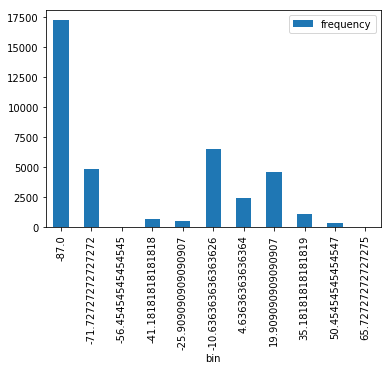

In [196]:
import pandas as pd
pd.DataFrame(
    list(zip(*gre_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');
